# Определение перспективного тарифа для телеком компании

Я аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Моя задача провести предварительный анализ тарифов, имея данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### План исследования:

[Шаг 1. Открытие файлов с данными и изучение общей информации;](#1)     

[Шаг 2. Подготовка данных:](#2)     

[а. Приведение данных к нужным типам;](#3)        
[б. Поиск и исправление ошибок в данных;](#4)        
[в. Подсчет для каждого пользователя:](#5)        
 
 - количества сделанных звонков и израсходованных минут разговора по месяцам;
 - количества отправленных сообщений по месяцам;
 - объем израсходованного интернет-трафика по месяцам;
 - помесячной выручки с каждого пользователя;
 
[Шаг 3. Анализ данных:](#6)    
[а. Описание поведения клиентов оператора, исходя из выборки;](#7)    
[б. Расчет среднего количества, дисперсии и стандартного отклонения;](#8)     
[в. Построение гистограмм;](#9)    
[г. Описание распределений;](#10)    

[Шаг 4. Проверка гипотез:](#11)    
[а. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;](#12)     
[б. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;](#13)     

[Шаг 5. Общий вывод](#14)
 

<a name="1"></a>
## Шаг 1. Открытие файлов с данными и изучение общей информации

В моем распоряжении 5 таблиц в формате csv. Открою и изучу данные всех таблиц, предварительно вызвав необходимые мне в исследовании библиотеки.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
pd.set_option('mode.chained_assignment', None)
df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

from IPython.display import HTML
#Методом display() выведу все 5 таблиц:
display(df_calls)
display(df_internet)
display(df_messages)
display(df_tariffs)
display(df_users)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


Создам функцию для проверки первичных данных таблиц и проверю данные с помощью метода info()

In [2]:
from IPython.display import display
def simple_func(df_calls, df_internet, df_messages, df_tariffs, df_users):
    
    print('Звонки')
    display(df_calls.info())
    
    print('Интернет')
    display(df_internet.info())
    
    print('Сообщения')
    display(df_messages.info())
    
    print('Тарифы')
    display(df_tariffs.info())
    
    print('Пользователи')
    display(df_users.info())
    
simple_func(
    df_calls,
    df_internet,
    df_messages,
    df_tariffs,
    df_users    
)

Звонки
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

Интернет
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

Сообщения
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

Тарифы
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

Пользователи
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

<a name="2"></a>
## Шаг 2. Подготовка данных:

Проверю данные таблиц на пропущенные значения с помощью методов isnull() и sum(), предварительно создав функцию:

In [3]:
def simple_func_1(df_calls, df_internet, df_messages, df_tariffs, df_users):
    
    print('Звонки')
    display(df_calls.isnull().sum())
    
    print('Интернет')
    display(df_internet.isnull().sum())
    
    print('Сообщения')
    display(df_messages.isnull().sum())
    
    print('Тарифы')
    display(df_tariffs.isnull().sum())
    
    print('Пользователи')
    display(df_users.isnull().sum())
    
simple_func_1(
    df_calls,
    df_internet,
    df_messages,
    df_tariffs,
    df_users    
)

Звонки


id           0
call_date    0
duration     0
user_id      0
dtype: int64

Интернет


Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

Сообщения


id              0
message_date    0
user_id         0
dtype: int64

Тарифы


messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

Пользователи


user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

В столбце churn_date (дата прекращения пользования тарифом) таблицы df_users обнаружила пропуски, так как по условию, если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Эти пропуски нет смысла заполнять.

In [4]:
#Проверю таблицы на наличие дубликатов методами duplicated() и sum(), предварительно создав функцию:
def simple_func_2(df_calls, df_internet, df_messages, df_tariffs, df_users):
    
    print('Звонки')
    display(df_calls.duplicated().sum())
    
    print('Интернет')
    display(df_internet.duplicated().sum())
    
    print('Сообщения')
    display(df_messages.duplicated().sum())
    
    print('Тарифы')
    display(df_tariffs.duplicated().sum())
    
    print('Пользователи')
    display(df_users.duplicated().sum())
    
simple_func_2(
    df_calls,
    df_internet,
    df_messages,
    df_tariffs,
    df_users    
)

Звонки


0

Интернет


0

Сообщения


0

Тарифы


0

Пользователи


0

<a name="3"></a>
### Замена типа данных

In [5]:
#Методом to_datetime изменю типы данных на datetime64 в столбцах всех таблиц, где это необходимо:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%d')
#Методом info() проверю типы данных в столбцах:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [6]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format = '%Y-%m-%d')
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


In [7]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format = '%Y-%m-%d')
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [8]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format = '%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format = '%Y-%m-%d')
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Поменяла тип данных на datetime64 в столбцах 'call_date' таблицы df_calls,'session_date' таблицы df_internet,'message_date' таблицы df_messages, 'churn_date' и 'reg_date' таблицы df_users , чтобы далее иметь работать с датами, а не строками.

<a name="4"></a>
### Поиск ошибок

В таблице df_calls я обнаружила, что длительность многих звонков — 0.0 минут. Это скорее всего неотвеченные звонки.
А в таблице df_internet нашла значения 0.0 в столбце mb_used - объём потраченного за сессию интернет-трафика (в мегабайтах). Вполне возможно, эти сессии были слишком короткими, поэтому объем трафика был слишком мал, чтобы засчитаться, хотя есть вероятность, что пользователь вообще не пользовался Интернетом.
Я считаю неуместным обрабатывать нулевые значения как в первом, так и во втором случае. Далее я скорее всего отсортирую нулевые значения, потому что они неважны для моего анализа.

In [9]:
#В задании сказано, что «Мегалайн» всегда округляет вверх значения минут и мегабайтов, поэтому округлю значения 
#в столбце duration таблицы df_calls и столбце mb_used таблицы df_internet до большего целого значения, 
#вызвав библиотеку numpy и применив метод apply(np.ceil):
import numpy as np
df_calls['duration'] = df_calls['duration'].apply(np.ceil)
df_internet['mb_used'] = df_internet['mb_used'].apply(np.ceil)

<a name="5"></a>
### Расчет количества сделанных звонков по месяцам

In [10]:
#Создам в таблице df_calls столбец month, в котором будет указан номер месяца, в который был совершен звонок:
df_calls['month'] = df_calls['call_date'].dt.month
display(df_calls)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1.0,1499,12
202603,1499_216,2018-10-18,19.0,1499,10
202604,1499_217,2018-11-10,11.0,1499,11
202605,1499_218,2018-10-06,5.0,1499,10


In [11]:
#Создам сводную таблицу df_calls_count, применив метод pivot_table() к таблице df_calls, сгруппировав ее по столбцам 
#'user_id' и 'month':
df_calls_count = df_calls.pivot_table(index = ['user_id', 'month'], values ='id', aggfunc = 'count')
#Переименую столбец id методом rename():
df_calls_count.rename(columns = {'id': 'calls_count'}, inplace = True)
display(df_calls_count)

calls_count
user_id month             
1000    5               22
        6               43
        7               47
        8               52
        9               58
...                    ...
1498    10              41
1499    9                9
        10              68
        11              74
        12              69

[3174 rows x 1 columns]

### Расчет количества израсходованных минут разговора по месяцам

In [12]:
#Создам сводную таблицу df_calls_duration, применив метод pivot_table() к таблице df_calls, сгруппировав ее по столбцам 
#'user_id' и 'month':
df_calls_duration = df_calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = 'sum')
#Переименую столбец duration методом rename():
df_calls_duration.rename(columns = {'duration': 'calls_duration'}, inplace = True)
display(df_calls_duration)

calls_duration
user_id month                
1000    5               159.0
        6               172.0
        7               340.0
        8               408.0
        9               466.0
...                       ...
1498    10              247.0
1499    9                70.0
        10              449.0
        11              612.0
        12              492.0

[3174 rows x 1 columns]

### Расчет количества отправленных сообщений по месяцам

In [13]:
#Создам в таблице df_messages столбец month, в котором будет указан номер месяца, в который было отправлено сообщение:
df_messages['month'] = df_messages['message_date'].dt.month

#Создам сводную таблицу df_messages_count, применив метод pivot_table() к таблице df_messages, сгруппировав ее по столбцам 
#'user_id' и 'month':
df_messages_count = df_messages.pivot_table(index = ['user_id', 'month'], values = 'id', aggfunc = 'count')

#Переименую столбец id методом rename():
df_messages_count.rename(columns = {'id': 'messages_count'}, inplace = True)
display(df_messages_count)

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
...                       ...
1498    10                 42
1499    9                  11
        10                 48
        11                 59
        12                 66

[2717 rows x 1 columns]

### Расчет объема израсходованного интернет-трафика по месяцам

In [14]:
#Создам в таблице df_internet столбец month, в котором будет указан номер месяца, в который пользователь использовал мегабайты:
df_internet['month'] = df_internet['session_date'].dt.month
#Создам сводную таблицу df_internet_used, применив метод pivot_table() к таблице df_internet, сгруппировав ее по столбцам 
#'user_id' и 'month':
df_internet_used = df_internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = 'sum')
display(df_internet_used)

mb_used
user_id month         
1000    5       2256.0
        6      23257.0
        7      14016.0
        8      14070.0
        9      14581.0
...                ...
1498    10     20604.0
1499    9       1848.0
        10     17809.0
        11     17984.0
        12     13077.0

[3203 rows x 1 columns]

### Расчет помесячной выручки с каждого пользователя 

In [15]:
#Для расчета помесячной выручки с каждого пользователя объединим последовательно методом merge() таблицы, в которых есть столбцы,
#необходимые нам для рассчетов:
df_merged = df_calls_duration.merge(df_messages_count, on = ['user_id', 'month'], how ='outer')
df_merged = df_merged.merge(df_internet_used, on = ['user_id', 'month'], how ='outer')
df_merged.reset_index(inplace = True)
df_merged = df_merged.merge(df_users, on = 'user_id', how = 'left')
#Переименую столбец tariff методом rename():
df_merged.rename(columns = {'tariff': 'tariff_name'}, inplace = True)
df_merged = df_merged.merge(df_tariffs, on = 'tariff_name', how = 'left')

#Заполню пропуски в итоговой таблице на 0, чтобы в интересующем меня столбце с выручкой по каждому пользователю не было значений
#Nan:
df_merged = df_merged.fillna(0)

#Создам функцию для рассчета значений выручки по каждому пользователю:
def month_revenue(row):    
    if row['calls_duration'] < row['minutes_included']:
        calls_revenue = 0
    else:
        calls_revenue = (row['calls_duration'] - row['minutes_included']) * row['rub_per_minute']
        
    
    if row['messages_count'] < row['messages_included']:
        message_revenue = 0
    else:
        message_revenue = (row['messages_count'] - row['messages_included']) * row['rub_per_message'] 
        
        
    if row['mb_used'] < row['mb_per_month_included']:
        internet_revenue = 0
    else:
        internet_revenue = (row['mb_used'] - row['mb_per_month_included']) / 1024 * row['rub_per_gb']
        
#Общая выручка будет равна сумме тарифа, выручки от звонков, сообщений и Интернета:    
    total_revenue =  row['rub_monthly_fee'] + calls_revenue + message_revenue + internet_revenue
    return total_revenue

#Создам с помощью метода apply() столбец month_revenue с выручкой по каждому пользователю, округлю значения с помощью метода
#round():
df_merged['month_revenue'] = df_merged.apply(month_revenue, axis = 1).round()
display(df_merged)

,user_id,month,calls_duration,messages_count,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month_revenue
0,1000,5,159.0,22.0,2256.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6,172.0,60.0,23257.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7,340.0,75.0,14016.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8,408.0,81.0,14070.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9,466.0,57.0,14581.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,32.0,17232.0,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,916.0
3210,1489,10,0.0,21.0,19588.0,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,1376.0
3211,1489,11,0.0,20.0,17516.0,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,971.0
3212,1489,12,0.0,35.0,17341.0,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,937.0


In [16]:
print(f'{df_merged["user_id"].nunique()}')

498


<a name="6"></a>
### Шаг 3. Анализ данных

<a name="7"></a>
### Расчет среднего количества, дисперсии и стандартного отклонения:
### Звонки Smart

count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: calls_duration, dtype: float64

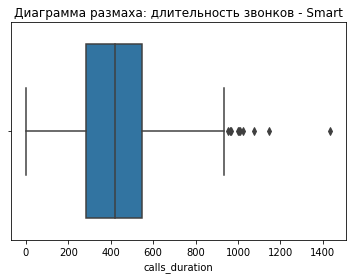

In [17]:
#С помощью метода query() отсортирую столбец tariff_name таблицы df_merged по тарифу "smart", чтобы далее анализировать 
#длительность звонков, количество сообщений и израсходованные мегабайты пользователей данного тарифа:
df_merged_smart = df_merged.query('tariff_name == "smart"')

#Построю диаграмму размаха для столбца calls_duration таблицы df_merged_smart, чтобы получить "ящик с усами" и увидеть 
#выбросы по длительности звонков в тарифе Smart:
sns.boxplot(df_merged_smart['calls_duration'])
plt.title("Диаграмма размаха: длительность звонков - Smart")
df_merged_smart['calls_duration'].describe()

По диаграмме размаха можно увидеть выбросы выше значения приблизительно равного 900. Среднее значение равно 417, что немного меньше медианного (422). Скорее всего большое количество нулевых значений (неотвеченные звонки и Nan, замененные в прошлом шаге на 0) и, наоборот, больших выбросов сказалось на среднем и медиане.

In [18]:
#С помощью метода query() построю срез для столбца calls_duration таблицы df_merged_smart, чтобы отсортировать выбросы
#по длитнельности звонков в тарифе Smart: 
df_merged_smart_calls = df_merged_smart.query('900 > calls_duration > 0')
#display(df_merged_smart_calls)

#Рассчитаю среднее значение для столбца calls_duration таблицы df_merged_smart_calls, округлю значения с помощью метода 
#round():
calls_duration_smart_average = df_merged_smart_calls['calls_duration'].mean().round(2)
print('Средняя продолжительность звонков:', calls_duration_smart_average)

#Рассчитаю среднее значение для столбца calls_duration таблицы df_merged_smart_calls, сгруппировав методом groupby() столбец
#по месяцам, округлю значения с помощью метода round():
calls_duration_smart_average_month = df_merged_smart_calls.groupby('month')['calls_duration'].mean().round(2)
print('Средняя продолжительность звонков по месяцам:', calls_duration_smart_average_month)

#Рассчитаю дисперсию для столбца calls_duration с помощью метода np.var():
calls_duration_smart_variance = np.var(df_merged_smart_calls['calls_duration'], ddof = 1).round(2)
print('Дисперсия:', calls_duration_smart_variance)

#Рассчитаю стандартное отклонение для столбца calls_duration с помощью метода np.std():
calls_duration_smart_st_deviation = np.std(df_merged_smart_calls['calls_duration']).round(2)
print('Стандартное отклонение:', calls_duration_smart_st_deviation)

Средняя продолжительность звонков: 415.19
Средняя продолжительность звонков по месяцам: month
1     210.03
2     298.69
3     390.05
4     370.44
5     387.36
6     398.07
7     408.35
8     420.79
9     430.27
10    420.43
11    433.41
12    464.42
Name: calls_duration, dtype: float64
Дисперсия: 33353.03
Стандартное отклонение: 182.59


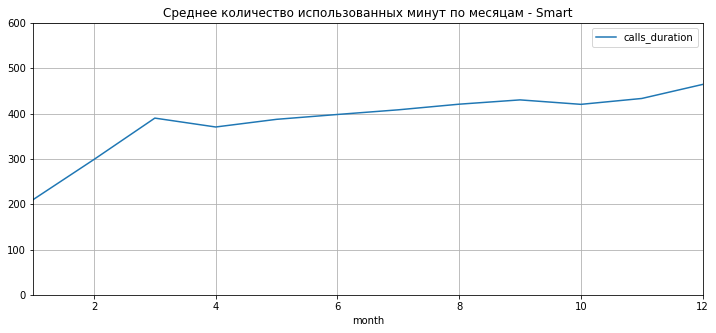

In [19]:
#Построю график, который покажет среднюю длительность разговоров пользователей тарифа Smart по месяцам, предварительно создав 
#сводную таблицу:
grouped_calls_s = df_merged_smart_calls.pivot_table(index = 'month', values = 'calls_duration')
grouped_calls_s.plot(ylim = (0, 600), xlim = (1, 12), title = "Среднее количество использованных минут по месяцам - Smart", 
                     figsize = (12, 5), grid = True)
plt.show()

### Звонки Ultra

count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: calls_duration, dtype: float64

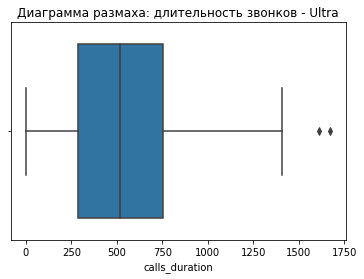

In [20]:
#С помощью метода query() отсортирую столбец tariff_name таблицы df_merged по тарифу "ultra", чтобы далее анализировать 
#длительность звонков, количество сообщений и израсходованные мегабайты пользователей данного тарифа:
df_merged_ultra = df_merged.query('tariff_name == "ultra"')
#display(df_merged_ultra)

#Построю диаграмму размаха для столбца calls_duration таблицы df_merged_ultra, чтобы получить "ящик с усами" и увидеть 
#выбросы по длительности звонков в тарифе Ultra:
sns.boxplot(df_merged_ultra['calls_duration'])
plt.title("Диаграмма размаха: длительность звонков - Ultra")
df_merged_ultra['calls_duration'].describe()

На диаграмме размаха наблюдаются выбросы приблизительно выше значения 1330 минут. Среднее значение равно 526, медианное значение равно 518 - присутствие больших выбросов немного сказалось на среднем.

In [21]:
#С помощью метода query() построю срез для столбца calls_duration таблицы df_merged_ultra, чтобы отсортировать выбросы 
#по длительности звонков в тарифе Ultra: 
df_merged_ultra_calls = df_merged_ultra.query('1330 > calls_duration > 0')
#display(df_merged_ultra_calls)

#Рассчитаю среднее значение для столбца calls_duration таблицы df_merged_ultra_calls, округлю значения с помощью метода 
#round():
calls_duration_ultra_average = df_merged_ultra_calls['calls_duration'].mean().round(2)
print('Средняя продолжительность звонков:', calls_duration_ultra_average)

#Рассчитаю среднее значение для столбца calls_duration таблицы df_merged_ultra_calls, сгруппировав методом groupby() столбец
#по месяцам, округлю значения с помощью метода round():
calls_duration_ultra_average_month = df_merged_ultra_calls.groupby('month')['calls_duration'].mean().round(2)
print('Средняя продолжительность звонков по месяцам:', calls_duration_ultra_average_month)

#Рассчитаю дисперсию для столбца calls_duration с помощью метода np.var():
calls_duration_ultra_variance = np.var(df_merged_ultra_calls['calls_duration'], ddof = 1).round(2)
print('Дисперсия:', calls_duration_ultra_variance)

#Рассчитаю стандартное отклонение для столбца calls_duration с помощью метода np.std():
calls_duration_ultra_st_deviation = np.std(df_merged_ultra_calls['calls_duration']).round(2)
print('Стандартное отклонение:', calls_duration_ultra_st_deviation)

Средняя продолжительность звонков: 541.93
Средняя продолжительность звонков по месяцам: month
1     428.11
2     310.04
3     458.56
4     475.30
5     534.25
6     486.06
7     570.89
8     535.81
9     563.96
10    568.18
11    562.36
12    601.38
Name: calls_duration, dtype: float64
Дисперсия: 88455.83
Стандартное отклонение: 297.26


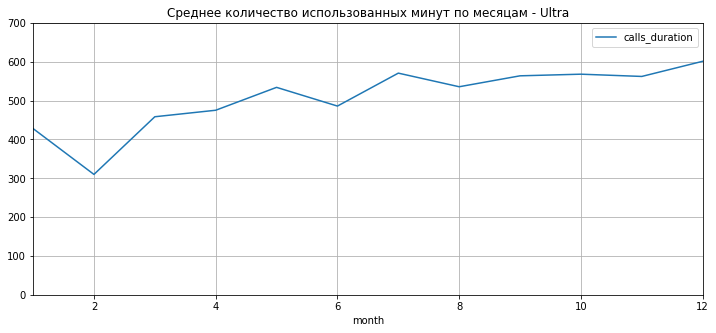

In [22]:
#Построю график, который покажет среднюю длительность разговоров пользователей тарифа Ultra по месяцам:
grouped_calls_u = df_merged_ultra_calls.pivot_table(index = 'month', values = 'calls_duration')
grouped_calls_u.plot(ylim = (0, 700),xlim =(1, 12), title = "Среднее количество использованных минут по месяцам - Ultra",\
                     figsize = (12, 5), grid = True)

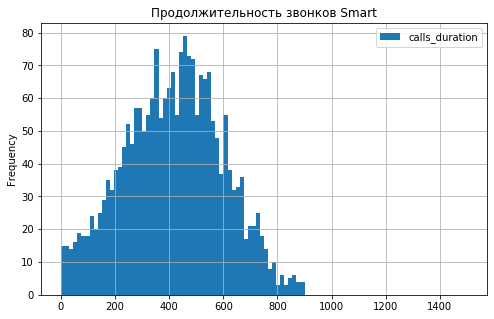

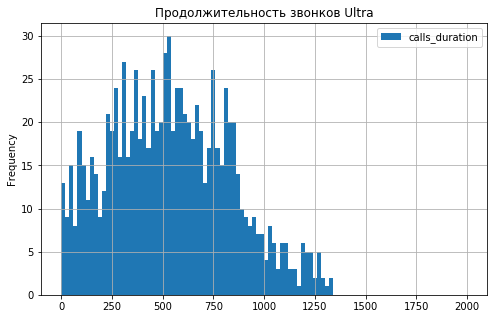

In [23]:
#Чтобы увидеть частоту продолжительности звонков в каждом из 2-ух тарифов, построю гистограммы по столбцу calls_duration 
#обоих таблиц - df_merged_smart_calls и df_merged_ultra_calls:
import matplotlib.pyplot as plt
def simple_func_3(df_merged_smart_calls, df_merged_ultra_calls):
    
    df_merged_smart_calls.plot(y = 'calls_duration', kind = 'hist', bins = 100, grid = True, figsize = (8,5),\
                               range = (1, 1500), title = "Продолжительность звонков Smart")
    
    df_merged_ultra_calls.plot(y = 'calls_duration', kind = 'hist', bins = 100, grid = True, figsize = (8,5),\
                               range = (1, 2000), title = "Продолжительность звонков Ultra")
    
simple_func_3(
    df_merged_smart_calls,
    df_merged_ultra_calls
)

In [24]:
#Получу характерную информацию по столбцу calls_duration каждой из таблиц - df_merged_smart_calls и 
#df_merged_ultra_calls:

def simple_func_4(df_merged_smart_calls, df_merged_ultra_calls):
    
    print('Звонки Smart ')
    display(df_merged_smart_calls['calls_duration'].describe())
    
    print('Звонки Ultra')
    display(df_merged_ultra_calls['calls_duration'].describe())

simple_func_4(
    df_merged_smart_calls,
    df_merged_ultra_calls
)    

Звонки Smart 


count    2205.000000
mean      415.192744
std       182.628113
min         2.000000
25%       283.000000
50%       421.000000
75%       543.000000
max       891.000000
Name: calls_duration, dtype: float64

Звонки Ultra


count     941.000000
mean      541.925611
std       297.415257
min         1.000000
25%       311.000000
50%       526.000000
75%       755.000000
max      1322.000000
Name: calls_duration, dtype: float64

В среднем клиент тарифа Smart тратит примерно 415 минут на телефонные разговоры, в сравнение, пользователь тарифа Ultra - 542 минуты.
К тому же средняя продолжительность разговоров в месяц у пользователей тарифа Smart постепенно увеличивается с января до декабря - от 210 до 464 минут соответственно, прибавляя до 30% в росте каждый месяц. В свою очередь пользователи тарифа Ultra разговаривают примерно 428 минут в январе и 601 минуту в декабре, в феврале происходит спад средней продолжительности разговоров на 28%, но в марте этот показатель начинает расти.

В целом в обоих случаях можно наблюдать нормальное распределение данных, так как и в случае с тарифом Smart, и с Ultra работает правило 3-ёх сигм. Практически все значения (около 99%) находятся в промежутке (μ-3σ, μ+3σ): Smart (-129.37, 915.59), Ultra (-336.56, 1364.56). 

Медианное значение продолжительности разговоров тарифа Smart равно

Можно сделать вывод, что пользователь тарифа Smart в среднем не тратит все 500 минут, включенных в ежемесячный пакет услуг, но третий квартиль равен 543 (то есть 75% пользователей тратят в среднем до 543 минут на разговоры), это значит, что около 30% пользователей расходуют дополнительные минуты, не включенные в тариф(500 минут). За 43 минуты клиенты доплачивают 3 руб.* 43 мин.= 129 руб.
Пользователи тарифа Ultra вообще не трятят все 3000 минут включенные в тариф, максимум - 1322 минут, что меньше половины от предложенного оператором времени. Следовательно и дополнительные минуты пользователями тарифа Ultra невостребованы.

<a name="8"></a>
### Сообщения Smart

count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: messages_count, dtype: float64

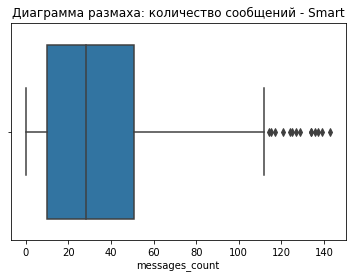

In [25]:
#Построю диаграмму размаха для столбца messages_count таблицы df_merged_smart, чтобы получить "ящик с усами" и увидеть 
#выбросы по количеству сообщений в тарифе Smart:
sns.boxplot(df_merged_smart['messages_count'])
plt.title("Диаграмма размаха: количество сообщений - Smart")
#Методом describe() получила характерные значения столбца messages_count: 
df_merged_smart['messages_count'].describe()

На построенных диаграмме размаха хорошо видны выбросы - ими можно считать значения выше 112, а медиана количества сообщений равна 28, что немного меньше среднего (33) - причиной чего являются выбросы. Очищу столбец messages_count от выбросов, а также от нулевых значений, которых очень много (в прошлом шаге пришлось поменять Nan на 0, чтобы вывести выручку с каждого клиента в отдельный столбец).

In [26]:
#С помощью метода query() построю срез для столбца messages_count таблицы df_merged_smart, чтобы отсортировать выбросы
#количества сообщений в тарифе Smart: 
df_merged_smart_messages = df_merged_smart.query('0 < messages_count < 112')
#display(df_merged_smart_messages)

#Рассчитаю среднее значение для столбца messages_count таблицы df_merged_smart_messages, округлю значения с помощью метода 
#round():
messages_count_smart_average = df_merged_smart_messages['messages_count'].mean().round(2)
print('Среднее количество сообщений:', messages_count_smart_average)

#Рассчитаю среднее значение для столбца messages_count таблицы df_merged_smart_messages, сгруппировав методом groupby()
#столбец по месяцам, округлю значения с помощью метода round():
messages_count_smart_average_month = df_merged_smart_messages.groupby('month')['messages_count'].mean().round(2)
print('Среднее количество сообщений по месяцам:', messages_count_smart_average_month)

#Рассчитаю дисперсию для столбца messages_count с помощью метода np.var():
messages_count_smart_variance = np.var(df_merged_smart_messages['messages_count'], ddof = 1).round(2)
print('Дисперсия:', messages_count_smart_variance)

#Рассчитаю стандартное отклонение для столбца messages_count, получив корень из дисперсии методом np.sqrt():
messages_count_smart_st_deviation = np.sqrt(messages_count_smart_variance).round(2)
print('Стандартное отклонение:', messages_count_smart_st_deviation)

Среднее количество сообщений: 38.02
Среднее количество сообщений по месяцам: month
1     20.00
2     27.94
3     35.55
4     35.86
5     39.03
6     37.34
7     38.42
8     37.92
9     38.44
10    38.34
11    39.26
12    41.05
Name: messages_count, dtype: float64
Дисперсия: 660.52
Стандартное отклонение: 25.7


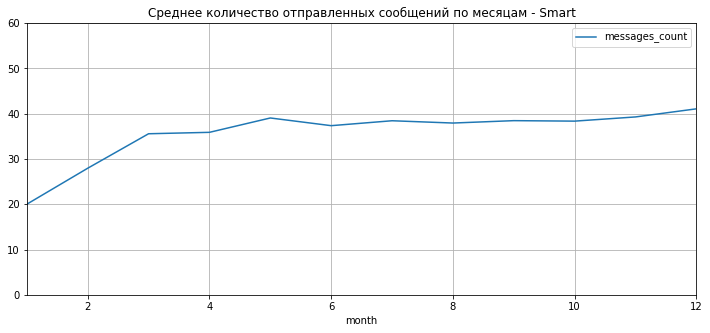

In [27]:
#Построю график, который покажет среднееколичество отправленных сообщений пользователей тарифа Smart по месяцам, предварительно
#создав сводную таблицу:
grouped_messages_s = df_merged_smart_messages.pivot_table(index = 'month', values = 'messages_count')
grouped_messages_s.plot(ylim = (0, 60), xlim = (1, 12),\
                        title = "Среднее количество отправленных сообщений по месяцам - Smart", figsize = (12, 5), grid = True)

   ### Сообщения Ultra

count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: messages_count, dtype: float64

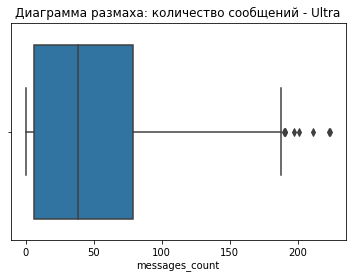

In [28]:
#Построю диаграмму размаха для столбца messages_count таблицы df_merged_ultra, чтобы получить "ящик с усами" и увидеть 
#выбросы по количеству сообщений в тарифе Ultra:
sns.boxplot(df_merged_ultra['messages_count'])
plt.title("Диаграмма размаха: количество сообщений - Ultra")
#Методом describe() получила характерные значения столбца messages_count: 
df_merged_ultra['messages_count'].describe()

По диаграмме размаха можно увидеть выбросы выше значения 185, медиана равна 38, в сравнение среднее равно 49, выбросы значительно  сказались на среднем значении. Очищу столбец messages_count от выбросов, а также от нулевых значений, которых очень много (в прошлом шаге пришлось поменять Nan на 0, чтобы вывести выручку с каждого клиента в отдельный столбец).

In [29]:
#С помощью метода query() построю срез для столбца messages_count таблицы df_merged_ultra, чтобы отсортировать выбросы 
#количества сообщений в тарифе Ultra: 
df_merged_ultra_messages = df_merged_ultra.query('185 > messages_count > 0')
#display(df_merged_ultra_messages)

#Рассчитаю среднее значение для столбца messages_count таблицы df_merged_ultra_messages, округлю значения с помощью метода 
#round():
messages_count_ultra_average = df_merged_ultra_messages['messages_count'].mean().round(2)
print('Среднее количество сообщений:', messages_count_ultra_average)

#Рассчитаю среднее значение для столбца messages_count таблицы df_merged_ultra_messages, сгруппировав методом groupby() 
#столбец по месяцам, округлю значения с помощью метода round():
messages_count_ultra_average_month = df_merged_ultra_messages.groupby('month')['messages_count'].mean().round(2)
print('Среднее количество сообщений по месяцам:', messages_count_ultra_average_month)

#Рассчитаю дисперсию для столбца messages_count с помощью метода np.var():
messages_count_ultra_variance = np.var(df_merged_ultra_messages['messages_count'], ddof = 1).round(2)
print('Дисперсия:', messages_count_ultra_variance)

#Рассчитаю стандартное отклонение для столбца messages_count, получив корень из дисперсии методом np.sqrt():
messages_count_ultra_st_deviation = np.sqrt(messages_count_ultra_variance).round(2)
print('Стандартное отклонение:', messages_count_ultra_st_deviation)

Среднее количество сообщений: 59.39
Среднее количество сообщений по месяцам: month
1     43.43
2     32.94
3     47.80
4     44.51
5     48.77
6     50.06
7     60.07
8     58.90
9     61.97
10    64.63
11    64.99
12    69.65
Name: messages_count, dtype: float64
Дисперсия: 1884.83
Стандартное отклонение: 43.41


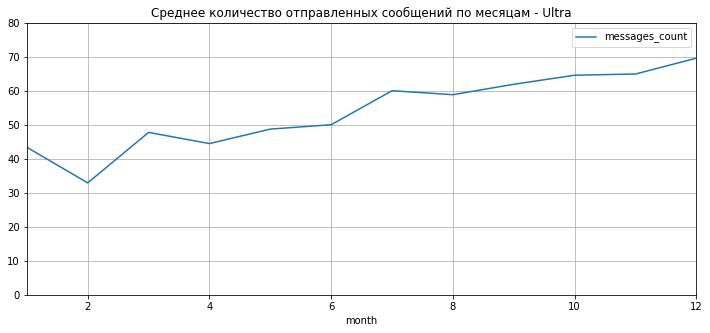

In [30]:
#Построю график, который покажет среднее количество отправленных сообщений пользователей тарифа Ultra по месяцам, предварительно
#создав сводную таблицу:
grouped_messages_u = df_merged_ultra_messages.pivot_table(index = 'month', values = 'messages_count')
grouped_messages_u.plot(ylim = (0, 80), xlim = (1, 12),\
                title = "Среднее количество отправленных сообщений по месяцам - Ultra", figsize = (12, 5), grid = True)

count    1907.000000
mean       38.020975
std        25.700502
min         1.000000
25%        17.000000
50%        33.000000
75%        55.000000
max       111.000000
Name: messages_count, dtype: float64

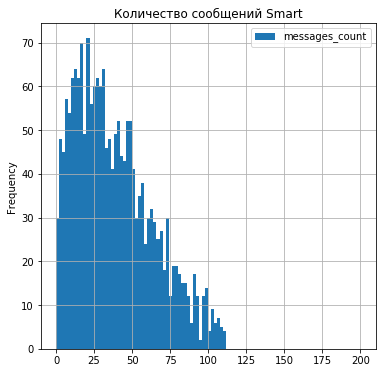

In [31]:
#Построю с помощью метода plot() 2 гистограммы для столбца 'messages_count' двух таблиц - df_merged_smart и 
#df_merged_ultra, чтобы увидеть частоту отправки определенного количества сообщений в обоих тарифах:
df_merged_smart_messages.plot(y = 'messages_count', kind = 'hist', bins = 100, grid = True, figsize = (6,6),\
                              range = (0, 200), title = "Количество сообщений Smart")
#Методом describe() получу характерные значения столбца messages_count: 
df_merged_smart_messages['messages_count'].describe()

count    785.000000
mean      59.391083
std       43.414573
min        1.000000
25%       24.000000
50%       50.000000
75%       85.000000
max      183.000000
Name: messages_count, dtype: float64

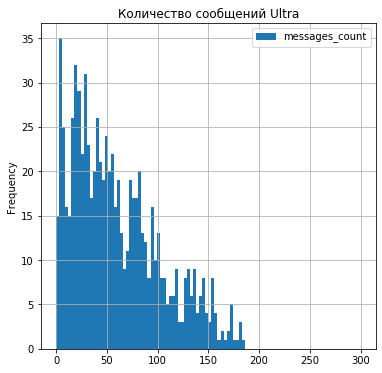

In [32]:
df_merged_ultra_messages.plot(y = 'messages_count', kind = 'hist', bins = 100, grid = True, figsize = (6,6),\
                              range = (0, 300), title = "Количество сообщений Ultra")
df_merged_ultra_messages['messages_count'].describe()

После сортировки столбца messages_count таблицы df_merged_smart от выбросов и нулевых значений среднее увеличилось с 33 до 38( медиана тоже увеличилась - видимо нулевых значений было слишком много). Получается, что в среднем пользователь тарифа Smart отправляет 38 сообщений в месяц. Но третий квартиль равен 51, значит примерно 25% клиентов доплачивают за 1 и более дополнительное сообщение, стомость одного которого равна 3 рубля.
После же сортировки от выбросов и нулей столбца messages_count таблицы df_merged_ultra среднее значение выросло с 49 до 59, медиана также выросла по той же причине, что и в тарифе Smart - большое количество нулевых значений. В итоге пользователь тарифа Ultra в среднем отправляет 59 сообщений в месяц. 
В среднем ни пользователь тарифа Smart, ни Ultra не отправляют больше сообщений, чем включены в их пакеты, при том пользователи тарифа Ultra не отправляют даже 6% сообщений от включенных в их пакет услуг.

Здесь похожая ситуация как и со звонками - количество сообщений увеличивается каждый месяц на 4-30%, с января по декабрь наблюдается рост в 2 раза у пользователей тарифа Smart - c 20 до 41 сообщения соответственно. Пользователи тарифа Ultra в декабре отправляют в среднем 43 сообщения, в марте количество сообщений, как и количество звонков падает, а затем опять растет, к декабрю среднее количество сообщений равно 70 - рост на 39%, считая с января.

В обоих случаях датасеты имеют небольшую скошенность вправо, видимо и в случае с тарифом Smart, и с Ultra не всегда работает правило 3-ёх сигм (все значения (около 99%) находятся в промежутке (μ-3σ, μ+3σ)): Smart (-39.1, 115.1), Ultra (-71.23, 189.23). Но все же имееются небольшие выбросы, хотя я попыталась очистить данные от них.

<a name="9"></a>
### Интернет Smart

count     2229.000000
mean     16229.188425
std       5877.576978
min          0.000000
25%      12658.000000
50%      16531.000000
75%      20068.000000
max      38610.000000
Name: mb_used, dtype: float64

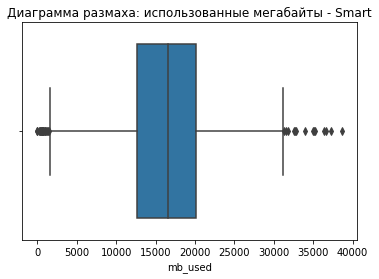

In [33]:
#Построю диаграмму размаха для столбца mb_used таблицы df_merged_smart, чтобы получить "ящик с усами" и увидеть выбросы по
#количеству использованных мегабайт в тарифе Smart:
sns.boxplot(df_merged_smart['mb_used'])
plt.title("Диаграмма размаха: использованные мегабайты - Smart")
#Методом describe() получу характерные значения столбца mb_used: 
df_merged_smart['mb_used'].describe()

По диаграмме размаха видим выбросы ниже значения примерно 2000 и выше приблизительно 31000 мегабайт. Среднее равно 16208, что не сильно отличается от медианного значения (16507), видимол потому что выбросов ниже первого квартиля и выше четвертого квартиля одинаково много.

In [34]:
#С помощью метода query() построю срез для столбца messages_count таблицы df_merged_smart, чтобы отсортировать выбросы 
#в тарифе Smart: 
df_merged_smart_mb_used = df_merged_smart.query('31000 > mb_used > 2000')
#display(df_merged_smart_mb_used)

#Рассчитаю среднее значение для столбца mb_used таблицы df_merged_smart_mb_used, округлю значения с помощью метода round():
mb_used_smart_average = df_merged_smart_mb_used['mb_used'].mean().round(2)
print('Среднее количество израсходованных мегабайт:', mb_used_smart_average)

#Рассчитаю среднее значение для столбца mb_used таблицы df_merged_smart_mb_used, сгруппировав методом groupby() столбец по 
#месяцам, округлю значения с помощью метода round():
mb_used_smart_average_month = df_merged_smart_mb_used.groupby('month')['mb_used'].mean().round(2)
print('Среднее количество израсходованных мегабайт по месяцам:', mb_used_smart_average_month)

#Рассчитаю дисперсию для столбца mb_used с помощью метода np.var():
mb_used_smart_variance = np.var(df_merged_smart_mb_used['mb_used'], ddof = 1).round(2)
print('Дисперсия:', mb_used_smart_variance)

#Рассчитаю стандартное отклонение для столбца mb_used, получив корень из дисперсии методом np.sqrt():
mb_used_smart_st_deviation = np.sqrt(mb_used_smart_variance).round(2)
print('Стандартное отклонение:', mb_used_smart_st_deviation)

Среднее количество израсходованных мегабайт: 16309.31
Среднее количество израсходованных мегабайт по месяцам: month
1      9502.27
2     12393.09
3     15123.86
4     13832.51
5     16138.39
6     15982.59
7     15985.78
8     16516.97
9     16504.65
10    16944.70
11    16909.67
12    17679.42
Name: mb_used, dtype: float64
Дисперсия: 29380667.22
Стандартное отклонение: 5420.39


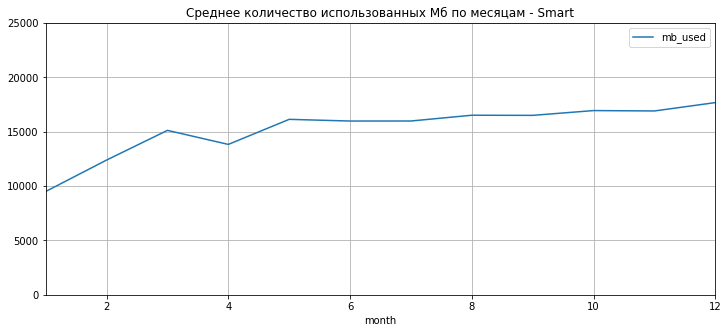

In [35]:
#Построю график, который покажет среднее количество отправленных сообщений пользователей тарифа Smart по месяцам, предварительно
#создав сводную таблицу:
grouped_mb_used_s = df_merged_smart_mb_used.pivot_table(index = 'month', values = 'mb_used')
grouped_mb_used_s.plot(ylim = (0, 25000), xlim = (1, 12),\
                    title = "Среднее количество использованных Мб по месяцам - Smart", figsize = (12, 5), grid = True)

### Интернет Ультра

count      985.000000
mean     19486.901523
std      10096.317202
min          0.000000
25%      11785.000000
50%      19324.000000
75%      26863.000000
max      49789.000000
Name: mb_used, dtype: float64

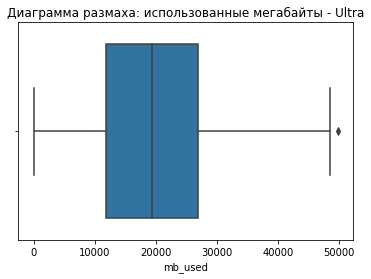

In [36]:
#Построю диаграмму размаха для столбца mb_used таблицы df_merged_ultra, чтобы получить "ящик с усами" и увидеть выбросы по 
#количеству использованных мегабайт в тарифе Ultra:
sns.boxplot(df_merged_ultra['mb_used'])
plt.title("Диаграмма размаха: использованные мегабайты - Ultra")
#Методом describe() получу характерные значения столбца mb_used: 
df_merged_ultra['mb_used'].describe()

По диаграмме размаха видим, что выбросов совсем немного и ими можно считать значения выше приблизительно 48000 мегабайт. Среднее значение равно 19486, что не намного отличается от медианы (19324), выбросов очень мало, поэтому они сильно не повлияли на среднее.

In [37]:
#С помощью метода query() построю срез для столбца mb_used таблицы df_merged_ultra, чтобы отсортировать выбросы в тарифе
#Ultra: 
df_merged_ultra_mb_used = df_merged_ultra.query('48000 > mb_used > 0')
#display(df_merged_ultra_mb_used)

#Рассчитаю среднее значение для столбца mb_used таблицы df_merged_ultra_mb_used, округлю значения с помощью метода round():
mb_used_ultra_average = df_merged_ultra_mb_used['mb_used'].mean().round(2)
print('Среднее количество израсходованных мегабайт:', mb_used_ultra_average)

#Рассчитаю среднее значение для столбца mb_used таблицы df_merged_ultra_mb_used, сгруппировав методом groupby() столбец по
#месяцам, округлю значения с помощью метода round():
mb_used_ultra_average_month = df_merged_ultra_mb_used.groupby('month')['mb_used'].mean().round(2)
print('Среднее количество израсходованных мегабайт по месяцам:', mb_used_ultra_average_month)

#Рассчитаю дисперсию для столбца mb_used с помощью метода np.var():
mb_used_ultra_variance = np.var(df_merged_ultra_mb_used['mb_used'], ddof = 1).round(2)
print('Дисперсия:', mb_used_ultra_variance)

#Рассчитаю стандартное отклонение для столбца mb_used, получив корень из дисперсии методом np.sqrt():
mb_used_ultra_st_deviation = np.sqrt(mb_used_ultra_variance).round(2)
print('Стандартное отклонение:', mb_used_ultra_st_deviation)

Среднее количество израсходованных мегабайт: 19646.52
Среднее количество израсходованных мегабайт по месяцам: month
1     13153.56
2     12858.50
3     17551.97
4     16843.80
5     19977.54
6     19170.46
7     20742.59
8     19506.38
9     19390.82
10    19984.02
11    19954.23
12    21971.66
Name: mb_used, dtype: float64
Дисперсия: 97166693.68
Стандартное отклонение: 9857.32


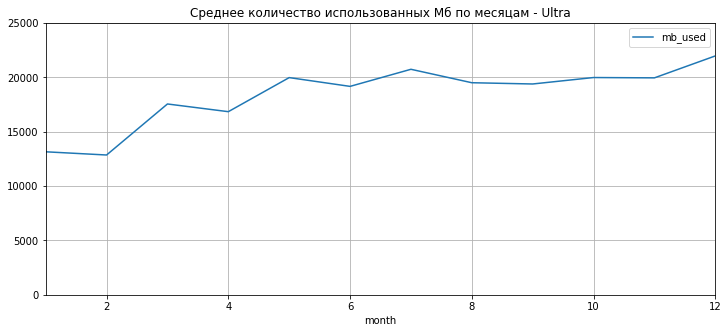

In [38]:
#Построю график, который покажет среднее количество отправленных сообщений пользователей тарифа Smart по месяцам, предварительно
#создав сводную таблицу:
grouped_mb_used_u = df_merged_ultra_mb_used.pivot_table(index = 'month', values = 'mb_used')
grouped_mb_used_u.plot(ylim = (0, 25000), xlim = (1, 12),\
                    title = "Среднее количество использованных Мб по месяцам - Ultra", figsize = (12, 5), grid = True)

count     2179.000000
mean     16309.305186
std       5420.393641
min       2003.000000
25%      12808.500000
50%      16565.000000
75%      20035.000000
max      30427.000000
Name: mb_used, dtype: float64

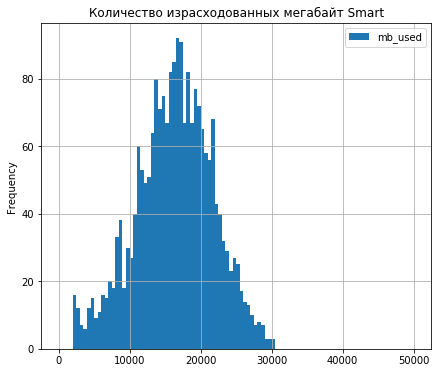

In [39]:
#Построю с помощью метода plot() 2 гистограммы для столбца 'mb_used' двух таблиц - df_merged_smart и df_merged_ultra,
#чтобы увидеть частоту использования мегабайт в обоих тарифах:
df_merged_smart_mb_used.plot(y = 'mb_used', kind = 'hist', bins = 100, grid = True, figsize = (7,6),\
                             range = (0, 50000), title = "Количество израсходованных мегабайт Smart")
#Методом describe() получу характерные значения столбца mb_used: 
df_merged_smart_mb_used['mb_used'].describe()

count      972.000000
mean     19646.516461
std       9857.316759
min        366.000000
25%      12041.250000
50%      19406.000000
75%      26875.500000
max      45222.000000
Name: mb_used, dtype: float64

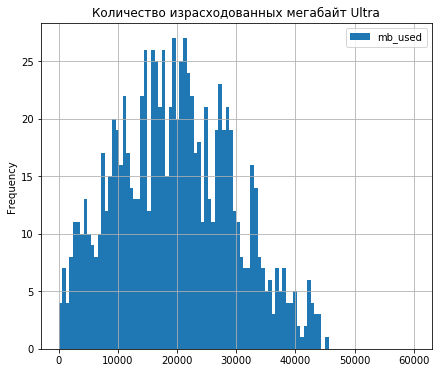

In [40]:
df_merged_ultra_mb_used.plot(y = 'mb_used', kind = 'hist', bins = 100, grid = True, figsize = (7,6),\
                             range = (0, 60000), title = "Количество израсходованных мегабайт Ultra")
df_merged_ultra_mb_used['mb_used'].describe()

После сортировки данных от выбросов в столбце mb_used среднее значение выросло с 16229 до 16309 мегабайт для тарифа Smart и с 19487 до 19647 для тарифа Smart.
В среднем пользователь тарифа Smart использует 16309 Мб Интернета, а пользователь тарифа Ultra - 19647 Мб.
При том что в пакет услуг Smart входит 15 Гб равное 15360 Мб, в среднем пользователь доплачивает 200 рублей за использованные вне тарифа мегабайты. А пользователь тарифа Ultra в среднем никогда не расходует все 30 Гб равные 30720 Мб, включенные в пакет услуг.

Если рассматривать потребление мегабайт по месяцам, то здесь ситуация повторяется - как и с сообщениями, и с телефонными разговорами, - с января по декабрь наблюдается увеличение используемых мегабайт. В тарифе Smart c 9502 в январе к декабрю число мегабайт увеличивается до 17679. В тарифе Ultra также - c 13154 мегабайт в январе растет до 21972 мегабайт в декабре.

На обоих гистограммах мы видим нормальное распределение - гистограммы не скошены в какую-либо сторону, значит правило 3-ёх сигм работает (все значения (около 99%) находятся в промежутке (μ-3σ, μ+3σ)): Smart (12.83, 32590.91), Ultra (-99171.1, 49173.24). 


<a name="10"></a>
### Как отличается выручка тарифа "Smart" от выручки тарифа "Ultra"

Посчитаю среднюю выручку по каждому тарифу, построю распределения, отсортирую выбросы.

In [41]:
#Средняя выручка по тарифу Smart:
average_revenue_smart = df_merged_smart['month_revenue'].mean()
print('Средняя выручка по тарифу Smart: ', average_revenue_smart)
#Средняя выручка по тарифу Ultra:
average_revenue_ultra = df_merged_ultra['month_revenue'].mean()
print('Средняя выручка по тарифу Ultra:', average_revenue_ultra)

Средняя выручка по тарифу Smart:  1233.3553162853298
Средняя выручка по тарифу Ultra: 2060.529949238579


count    2229.000000
mean     1233.355316
std       787.691785
min       550.000000
25%       550.000000
50%       960.000000
75%      1668.000000
max      6711.000000
Name: month_revenue, dtype: float64

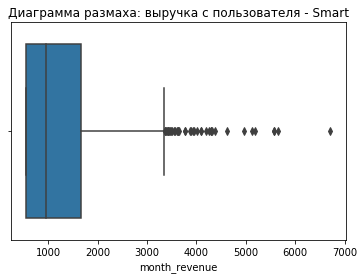

In [42]:
#Построю диаграмму размаха для столбца month_revenue таблицы df_merged_smart, чтобы получить "ящик с усами" и увидеть 
#выбросы по выручке с пользователя в тарифе Smart:
sns.boxplot(df_merged_smart['month_revenue'])
plt.title("Диаграмма размаха: выручка с пользователя - Smart")
#Методом describe() получу характерные значения столбца month_revenue: 
df_merged_smart['month_revenue'].describe()

На диаграмме размаха видны выбросы приблизительно выше значения 3000 рубллей. Отсортирую выбросы, чтобы получить более точное среднее  и медианное значение по выручке тарифа Smart.

count    2156.000000
mean     1150.880798
std       644.195139
min       550.000000
25%       550.000000
50%       935.000000
75%      1580.500000
max      2990.000000
Name: month_revenue, dtype: float64

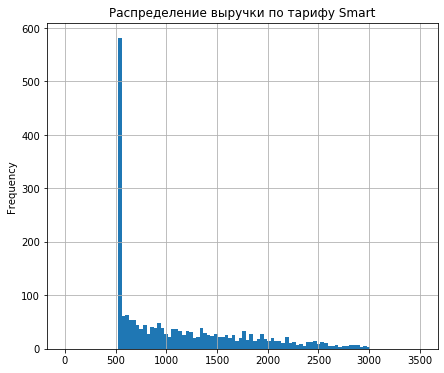

In [43]:
#С помощью метода query() построю срез для столбца month_revenue таблицы df_merged_smart, чтобы отсортировать выбросы в
#тарифе Smart: 
df_merged_smart_revenue = df_merged_smart.query('3000 > month_revenue')
df_merged_smart_revenue['month_revenue'].plot(y = 'month_revenue', kind = 'hist', bins = 100, grid = True,\
                        figsize = (7,6), range = (0, 3500), title = "Распределение выручки по тарифу Smart")
df_merged_smart_revenue['month_revenue'].describe()

count     985.000000
mean     2060.529949
std       356.291467
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4743.000000
Name: month_revenue, dtype: float64

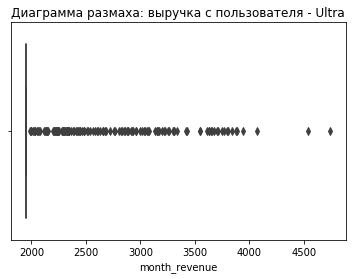

In [44]:
#Построю диаграмму размаха для столбца month_revenue таблицы df_merged_ultra, чтобы получить "ящик с усами" и увидеть 
#выбросы по выручке с пользователя в тарифе Ultra:
sns.boxplot(df_merged_ultra['month_revenue'])
plt.title("Диаграмма размаха: выручка с пользователя - Ultra")
#Методом describe() получу характерные значения столбца month_revenue: 
df_merged_ultra['month_revenue'].describe()

В целом, можно не сортировать столбец month_revenue в таблице тарифа Ultra, первый квартиль, медианное значение и третий квартиль и так равны ежемесячной плате за тариф - 1950 рублей.

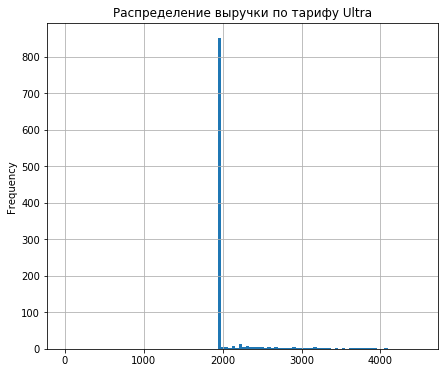

In [45]:
df_merged_ultra['month_revenue'].plot(y = 'month_revenue', kind = 'hist', bins = 100, grid = True,\
                                figsize = (7,6), range = (0, 4500), title = "Распределение выручки по тарифу Ultra")

Медианные значения более близко описывают, сколько в среднем пользователи платят за свой тариф в месяц. Медиана выручки по тарифу Ultra равна 1950 рублей - в среднем клиент не использует дополнительные минуты, не отправляет больше сообщений, чем включено в тариф и не расходует больше мегабайт. Медиана выручки по тарифу Smart равна 935 рублей, мы можем утверждать, что в среднем пользователю не хватает включенных в пакет минут разговора, сообщений или мегабайт интернета, поэтому он доплачивает еще 935 - 550 = 385 рублей в месяц.

<a name="11"></a>
## Шаг 4. Проверка гипотезы:
### средняя выручка пользователей тарифов «Ультра» и «Смарт» различается<a name="12"></a>

Нулевая гипотеза предполагает, что выручка тарифов равна. Альтернативная звучит так: "Средняя выручка пользователей тарифов "Смарт" и "Ультра" различается". 

Есть смысл решать вопрос о принятии или отвержении нулевой гипотезы по p-value. Это вероятность получить наблюдаемый или ещё более далёкий от предполагаемого результат при условии, что нулевая гипотеза верна. 

Чтобы проверить нулевую гипотезу сравним средние значения столбцов month_revenue таблиц двух тарифов - df_merged_smart и df_merged_ultra, как для двух генеральных совокупностей, применив метод scipy.stats.ttest_ind(array1, array2, equal_var).

In [46]:
# Задам критический уровень статистической значимости равный 0.01 - общепринятое пороговое значение.
#Если p-value окажется меньше него - отвергнем гипотезу:
alpha= 0.01

#Рассчитаю дисперсию для столбца month_revenue таблицы df_merged_smart с помощью метода np.var():
revenue_smart_variance = np.var(df_merged_smart['month_revenue'], ddof = 1).round(2)
#Рассчитаю дисперсию для столбца month_revenue таблицы df_merged_ultra с помощью метода np.var():
revenue_ultra_variance = np.var(df_merged_ultra['month_revenue'], ddof = 1).round(2)

print('Дисперсия средней выручки по тарифу Smart:', revenue_smart_variance)
print('Дисперсия средней выручки по тарифу Ultra:', revenue_ultra_variance)

#Дисперсии не равны, поэтому equal_var придадим значение False:
results = st.ttest_ind(df_merged_smart['month_revenue'], df_merged_ultra['month_revenue'], equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Дисперсия средней выручки по тарифу Smart: 620458.35
Дисперсия средней выручки по тарифу Ultra: 126943.61
p-значение: 8.911718216988335e-296
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу, так как p-значение получилось меньше критического уровня статистической значимости. Вывод: средняя выручка пользователей тарифов "Смарт" и "Ультра" различается.

<a name="13"></a>
## Проверка гипотезы:
### средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Нулевая гипотеза: "Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов". Альтернативная гипотеза звучит следующим образом: "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов". Чтобы проверить нулевую гипотезу для начала создадим  2 среза по значениям city == "Москва" и city != "Москва", чтобы можно было проанализировать среднюю выручку для Москвы и регионов отдельно. Затем сравним средние значения столбцов month_revenue таблиц двух тарифов - df_moscow и df_regions, как для двух генеральных совокупностей, применив метод scipy.stats.ttest_ind(array1, array2, equal_var).

In [47]:
#С помощью метода query() создам 2 среза по столбцу "city" таблицы df_merged по условиям "city == "Москва" и 
#"city != "Москва":
df_moscow = df_merged.query('city == "Москва"')
df_regions = df_merged.query('city != "Москва"')
#Задам критический уровень статистической значимости равный 0.01 - если p-value окажется меньше него - отвергнем гипотезу:
alpha= 0.01
#Дисперсии не равны, поэтому equal_var придадим значение False:
results = st.ttest_ind(df_moscow['month_revenue'], df_regions['month_revenue'], equal_var= False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.45489046098064356
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу, так как p-значение оказалось больше критического уровня статистической значимости.
Полученное значение p-value говорит о том, что хотя средняя выручка пользователей из Москвы и других регионов и неодинакова, с вероятностью приблизительно в 45% такое или большее различие можно получить случайно. А это слишком большая вероятность, чтобы делать вывод о значимом различии между средней выручкой.


<a name="14"></a>
## Шаг 5. Общий вывод

Я, как аналитик компании "Мегалайн", провела предварительный анализ тарифов "Смарт" и "Ультра" на небольшой выборке клиентов и сделала следующие выводы:

1. В среднем клиент тарифа "Смарт" тратит примерно 415 минут на телефонные разговоры, в сравнение, пользователь тарифа "Ультра" - 541 минуту. К тому же средняя продолжительность разговоров в месяц у пользователей тарифа "Смарт" постепенно увеличивается с января до декабря - от 210 до 464 минут соответственно, прибавляя до 30% в росте каждый месяц. В свою очередь пользователи тарифа "Ультра" разговаривают примерно 428 минут в декабре и 601 минуту в декабре, в феврале происходит спад средней продолжительности на 28%, но в марте этот показатель начинает расти.

2. Пользователь тарифа "Смарт" в среднем не тратит все 500 минут, включенных в ежемесячный пакет услуг, но третий квартиль равен 543 (то есть 75% пользователей тратят в среднем до 543 минуты на разговоры), это значит, что около 30% пользователей расходуют дополнительные минуты, не включенные в тариф(500 минут). За 43 минут клиенты доплачивают 3 руб.* 43 мин.= 129 руб. Пользователи тарифа "Ультра" вообще не трятят все 3000 минут включенные в тариф, максимум - 1322 минуты, что меньше половины от предложенного оператором времени. Следовательно и дополнительные минуты пользователями тарифа "Ультра" невостребованы.

3. В среднем пользователь тарифа "Смарт" отправляет 38 сообщений в месяц, а пользователь тарифа "Ультра" в среднем - 59 сообщений в месяц. Но ни среднестатистический пользователь тарифа "Смарт", ни "Ультра" не отправляет больше сообщений, чем включены в их пакеты, при том пользователи тарифа "Ультра" не отправляют даже 6% сообщений от включенных в их пакет услуг. Но примерно 25% клиентов тарифа "Смарт" доплачивают за 1 и более дополнительное сообщение, стомость которого равна 3 рубля. 

4. Количество сообщений увеличивается каждый месяц на 4-30%, с января по декабрь наблюдается рост в 2 раза у пользователей тарифа "Смарт" - c 20 до 41 сообщения соответственно. Пользователи тарифа "Ультра" в декабре отправляют в среднем 43 сообщения, в марте количество сообщений, как и количество звонков падает, а затем опять растет, к декабрю среднее количество сообщений равно 70 - рост на 39%, считая с января.

5. В среднем пользователь тарифа "Смарт" использует 16309 Мб Интернета, а пользователь тарифа Ultra - 19647 Мб. При том что в пакет услуг "Смарт" входит 15 Гб равное 15360 Мб, в среднем пользователь доплачивает 200 рублей за использованные вне тарифа мегабайты. А среднестатистический пользователь тарифа "Ультра" никогда не расходует все 30 Гб равные 30720 Мб, включенные в пакет услуг.

6. Если рассматривать потребление мегабайт по месяцам, то здесь ситуация повторяется - как и с сообщениями, и с телефонными разговорами, - с января по декабрь наблюдается увеличение используемых мегабайт. В тарифе "Смарт" c 9502 в январе к декабрю число мегабайт увеличивается до 17679 Мб. В тарифе "Ультра" также - c 13154 Мб в январе растет до 21972 Мб в декабре.

7. Средняя выручка пользователей тарифов "Смарт" и "Ультра" различается. Все-таки пользователи тарифа "Смарт" приносят меньшую выручку компании, чем пользователи тарифа "Ультра". Даже учитывая расход полного пакета услуг (стоимостью 550 рублей) клиентом тарифа "Смарт" и доплате за дополнительные минуты, сообщения и мегабайты, ежемесячная плата за тариф клиента "Ультра"(равная 1950 рублей) все-равно оказывается выше всех расходов пользователя "Смарт". Средняя выручка с клиентов тарифов "Смарт" и "Ультра" равна приблизительно 935 рублей и 1950 рублей в месяц соответственно.

8. Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов, по крайней мере обратное не удалось доказать.

Рекомендую коммерческому департаменту компании "Мегалайн" учесть выводы моего исследования и выделить средства на рекламную кампанию тарифа "Ультра", так как именно этот тариф приносит большую выручку.



SyntaxError: invalid syntax (<ipython-input-48-38c7845b0670>, line 1)